In [8]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, assemble

from qiskit.visualization import plot_histogram

n = 3

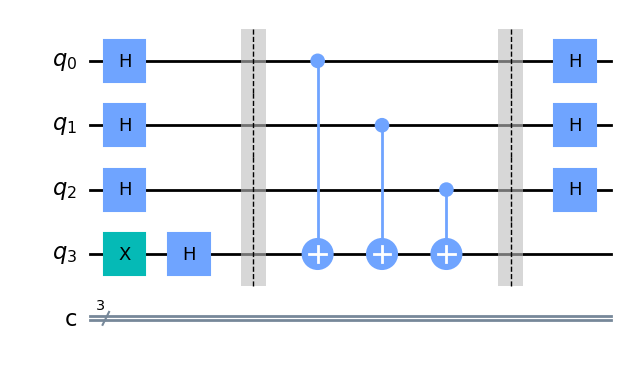

In [9]:
# Draw the circuit
circuit_a = QuantumCircuit(n+1,n)

# Hadamard q0, q1, q2
for qubit in range(n):
    circuit_a.h(qubit)

circuit_a.x(3) # Place X gate in q3
circuit_a.h(3) # Place hadamard in q3

circuit_a.barrier()

# XNOT gates
for qubit in range(n):
    circuit_a.cx(qubit, n)
    
circuit_a.barrier()

# Hadamard q0, q1, q2
for qubit in range(n):
    circuit_a.h(qubit)
    
circuit_a.draw(output='mpl')

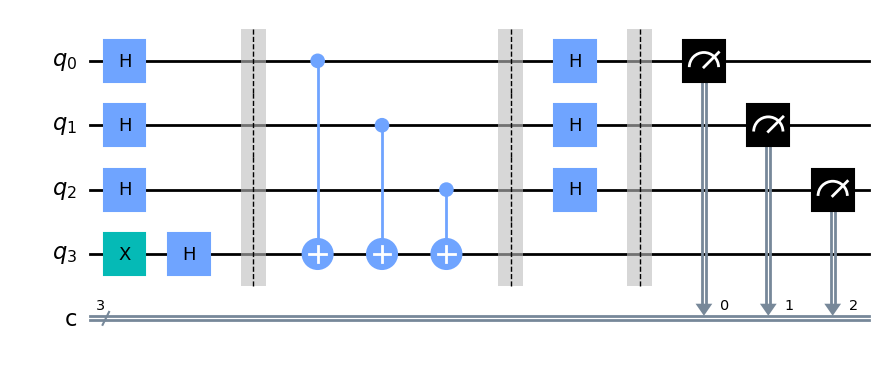

In [10]:
circuit_a.barrier()
# Measure
for i in range(n):
    circuit_a.measure(i,i)
    
circuit_a.draw(output='mpl')

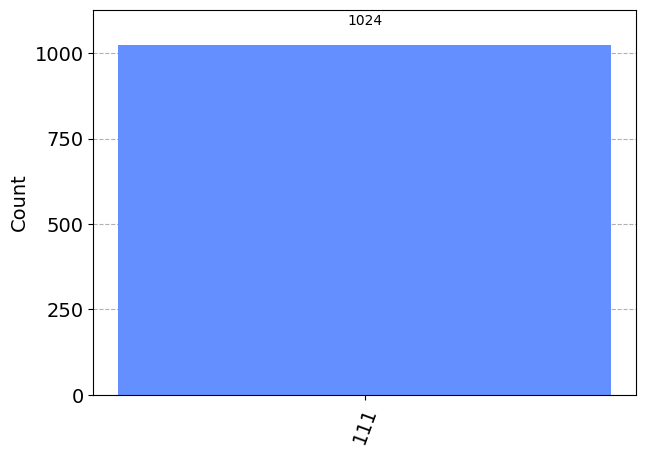

In [5]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit_a, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)